In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/v7_Latest_Data_Science_Salaries.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


In [3]:
data.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024
5,Business Intelligence Developer,Full-Time,Mid,Intermediate,80000,United States Dollar,United States,80000,United States,Medium,2024
6,BI Developer,Full-Time,Senior,Expert,90000,United States Dollar,United States,90000,United States,Medium,2024
7,BI Developer,Full-Time,Senior,Expert,70000,United States Dollar,United States,70000,United States,Medium,2024
8,Business Intelligence Analyst,Full-Time,Senior,Expert,127000,United States Dollar,United States,127000,United States,Medium,2024
9,Business Intelligence Analyst,Full-Time,Senior,Expert,72600,United States Dollar,United States,72600,United States,Medium,2024


In [6]:
data.describe()

,Salary,Salary in USD,Year
count,5.736000e+03,5736.000000,5736.000000
mean,1.831648e+05,144264.031032,2022.743375
std,5.637801e+05,70646.771842,0.644506
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,93300.000000,2023.000000
50%,1.397250e+05,136771.500000,2023.000000
75%,1.880000e+05,185000.000000,2023.000000
max,3.040000e+07,750000.000000,2024.000000


In [7]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

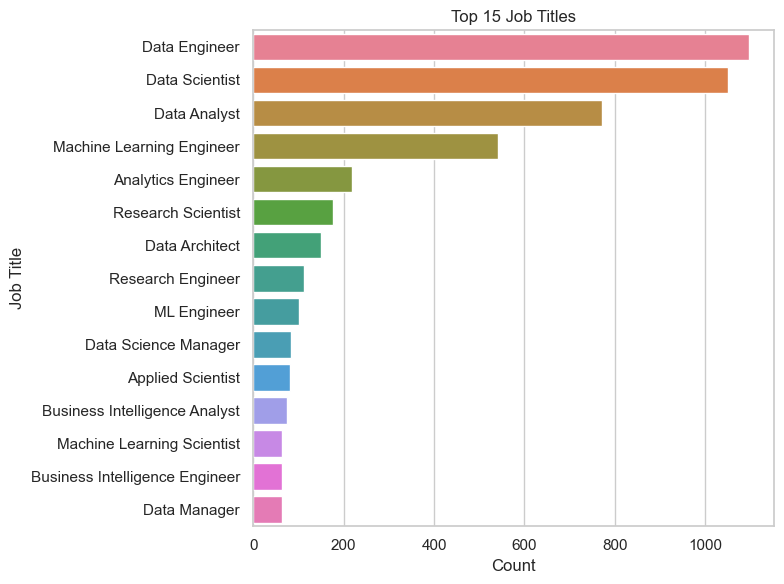

In [8]:
top15_job_title_counts = data["Job Title"].value_counts()[:15]

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
sns.barplot(x=top15_job_title_counts.values, y=top15_job_title_counts.index.to_list(),
            hue=top15_job_title_counts.index.to_list(), orient='h')

plt.title("Top 15 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")

plt.tight_layout()
plt.show()

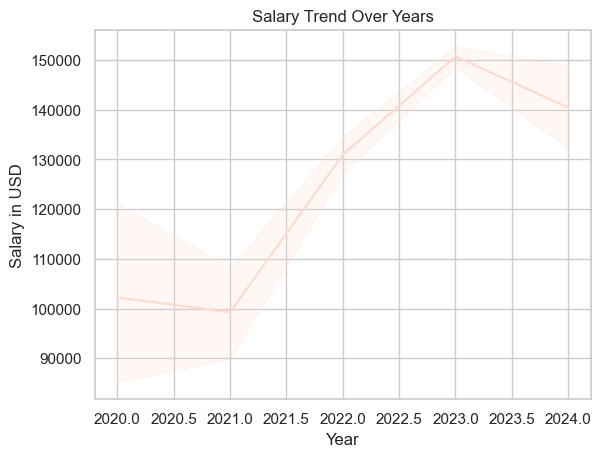

In [9]:
sns.set_theme(style="whitegrid", palette="Reds")
sns.lineplot(x="Year", y="Salary in USD", data=data)

plt.title("Salary Trend Over Years")

plt.show()

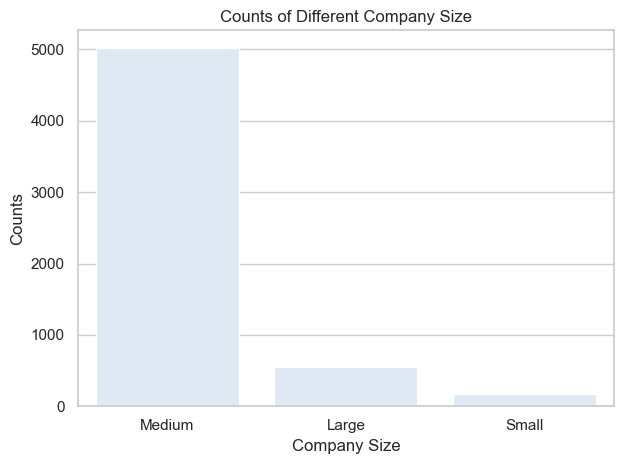

In [10]:
company_size_counts = data["Company Size"].value_counts()

sns.set_theme(style="whitegrid", palette="Blues")
sns.barplot(x=company_size_counts.index, y=company_size_counts.values)

plt.title('Counts of Different Company Size')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

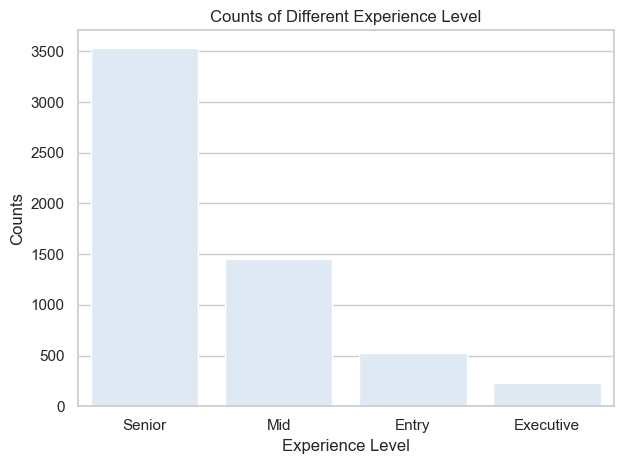

In [11]:
experience_level_counts = data["Experience Level"].value_counts()

sns.set_theme(style="whitegrid", palette="Blues")
sns.barplot(x=experience_level_counts.index, y=experience_level_counts.values)

plt.title('Counts of Different Experience Level')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()


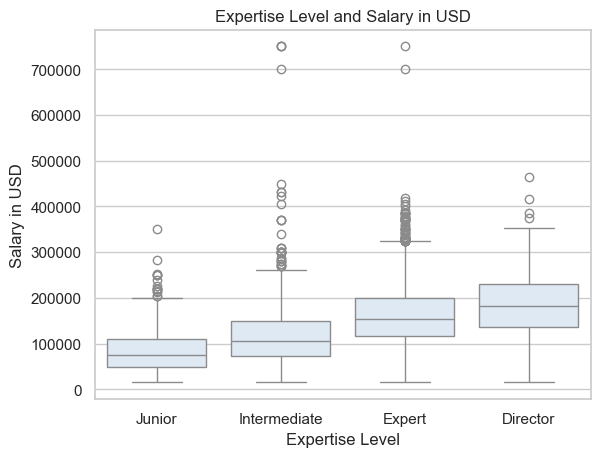

In [12]:
sns.set_theme(style="whitegrid", palette="Blues")
sns.boxplot(x="Expertise Level", y="Salary in USD", data=data,
                 order=["Junior", "Intermediate", "Expert", "Director"])

plt.title('Expertise Level and Salary in USD')

plt.show()


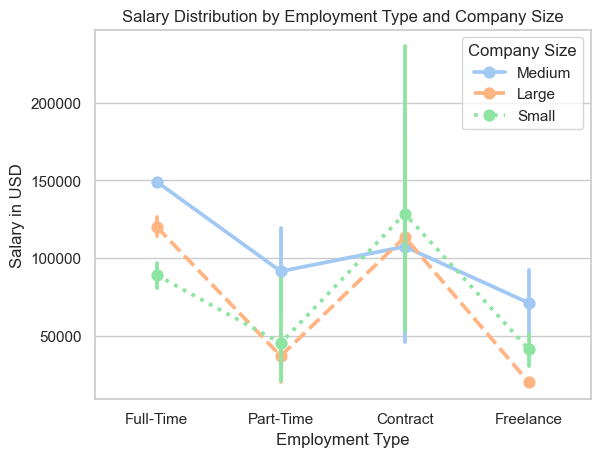

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.pointplot(data=data, x="Employment Type", y="Salary in USD", hue="Company Size",
              linestyles=["-", "--",":"])

plt.title("Salary Distribution by Employment Type and Company Size")

plt.show()

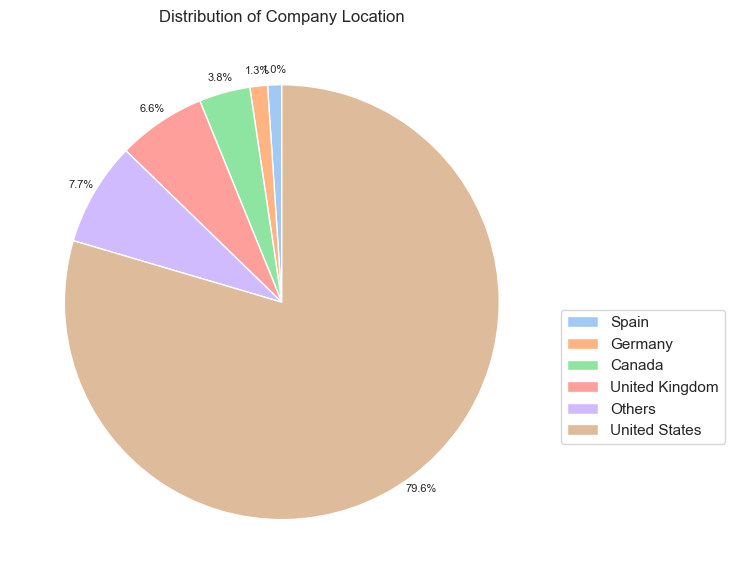

In [14]:
company_location_counts = data["Company Location"].value_counts()

company_location_labels = company_location_counts.index[:5].to_list()
company_location_values = list(company_location_counts.values[:5])

company_location_labels.append('Others')
company_location_values.append(
    sum(company_location_count 
        for company_location_count in company_location_counts.values[5:]
        )
    )

sorted_company_location = sorted(zip(company_location_values,company_location_labels), reverse=False)
company_location_values, company_location_labels = zip(*sorted_company_location)

company_location_colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(company_location_values, labels= None, colors=company_location_colors,
        autopct='%1.1f%%',  pctdistance=1.07, startangle=90, textprops={'fontsize': 8})

plt.title('Distribution of Company Location')
plt.legend(company_location_labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

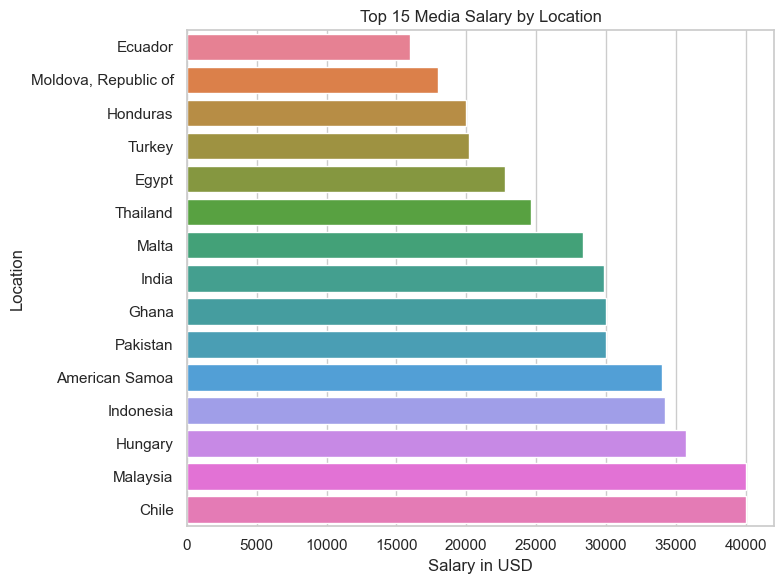

In [15]:
def median_salary_by_location(company_location):
    median_salary = data[data["Company Location"] == company_location]["Salary in USD"].median()
    return median_salary
#print(median_salary("United States"))

company_location_list = company_location_counts.index.to_list()
median_salary_dict_by_location = {}
for location in company_location_list:
    median_salary_dict_by_location[location] = median_salary_by_location(location)

median_salary_dict_by_location_sorted = dict(sorted(median_salary_dict_by_location.items(), key=lambda item: item[1])[:15])

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
sns.barplot(x=list(median_salary_dict_by_location_sorted.values()), y=list(median_salary_dict_by_location_sorted.keys()),
            hue=list(median_salary_dict_by_location_sorted.keys()), orient='h')

plt.title("Top 15 Media Salary by Location")
plt.xlabel("Salary in USD")
plt.ylabel("Location")

plt.tight_layout()
plt.show()